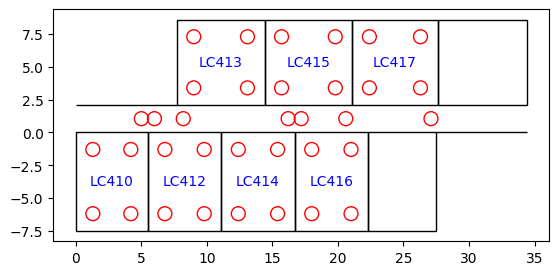

In [1]:
## Old version
import matplotlib.pyplot as plt
import pandas as pd
import Plan_builder as pb

rooms_db = pd.read_csv('rooms_table_old.csv')
points_db = pd.read_csv('points_table.csv')

carte = pb.Plan_builder(rooms_db, points_db)
carte.plot_walls()
carte.plot_points()
carte.plot_names()
plt.show()
#carte._save_points()
#carte._save_rooms_with_polygon()

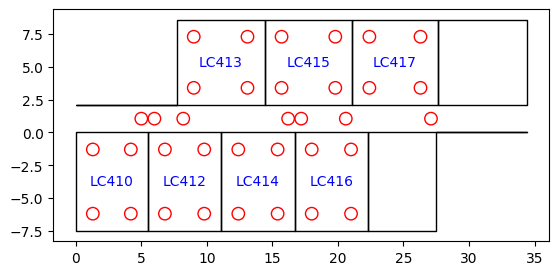

In [2]:
## New version
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

rooms_gdb = gpd.read_file('rooms_table.geojson')
points_db = pd.read_csv('points_table.csv')

# Fix the aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Walls
rooms_gdb.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Names
for index, row in rooms_gdb.iterrows():
    if not row["room"]=="extra_wall":
        poly = row['geometry']
        plt.text(poly.centroid.x, poly.centroid.y, row["room"], fontsize=10, ha='center', va='center', color='blue')
        
# Points
for index, row in points_db.iterrows():
    plt.scatter(row["x"], row["y"], marker='o', facecolor='None', edgecolor='red', s=80)
    
plt.show()